In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

import sys 
sys.path.append('../vespag')

from parse.vep_scores import get_vespag_scores, get_gemme_scores
from src.plotting import *
from src.amino_acid_groups import AA_GROUPS
from src.constants import GEMME_ALPHABET
from src.utils import *

In [6]:
for aa in GEMME_ALPHABET:
    # check which amino acids have the properties volume = medium and (charge = negative_charged or uncharged)
    if AA_GROUPS['volume_classes'][aa] == 'medium' and AA_GROUPS['charge_classes'][aa] in ['negative_charged', 'uncharged']:
        print(aa)


Q
V


In [27]:
for aa in GEMME_ALPHABET:
    # check which amino acids have the properties volume = medium and (charge = negative_charged or uncharged)
    if AA_GROUPS['volume_classes'][aa] == 'medium':
        print(aa)

E
H
Q
V


In [29]:
for aa in GEMME_ALPHABET:
    # check which amino acids have the properties volume = medium and (charge = negative_charged or uncharged)
    if AA_GROUPS['charge_classes'][aa] in ['negative_charged', 'uncharged']:
        print(aa)


A
C
F
G
I
L
M
N
P
Q
S
T
V
W
Y


In [7]:
# load the sequence from the fasta file 
fasta_path = '../data/MF974418_1_Crotalus_atrox.fasta'
with open(fasta_path) as f: 
    fasta = f.readlines()
    sequence = ''.join(fasta[1:]).replace('\n', '')
print(sequence)

SLVQFETLIMKIAGRSGLLWYSAYGCYCGWGGHGLPQDATDRCCFVHDCCYGKATDCNPKTVSYTYSEENGEIICGGDDPCGTQICECDKAAAICFRDNIPSYDNKYWLFPPKNCREEPEPC


In [8]:
sequence.count('Q')

3

In [9]:
sequence.count('V')

3

In [15]:
vespag_path = '/mnt/f/nicole/pla2_vespag/MF974418_1_Crotalus_atrox.csv'
vespag_scores = get_vespag_scores(vespag_path)
# invert the vespag score to get the mutation effect
vespag_scores['mutation_effect'] = - vespag_scores['vespag']
# normalize the mutation effect into [0,1]
vespag_scores['mutation_effect_normalized'] = (vespag_scores['mutation_effect'] - vespag_scores['mutation_effect'].min()) / (vespag_scores['mutation_effect'].max() - vespag_scores['mutation_effect'].min())
# extract residue_index 
vespag_scores['residue_index'] = vespag_scores['residue'].str[1:].astype(int)
# extract the wildtype residue
vespag_scores['wildtype'] = vespag_scores['residue'].str[0]
# extract the mutant residue
vespag_scores['mutant'] = vespag_scores['mutation'].str[-1]
vespag_scores.head()

,residue,mutation,vespag,mutation_effect,mutation_effect_normalized,residue_index,wildtype,mutant
0,S1,S1A,-2.733914,2.733914,0.338812,1,S,A
1,S1,S1Y,-4.639794,4.639794,0.595842,1,S,Y
2,S1,S1W,-4.962937,4.962937,0.639421,1,S,W
3,S1,S1V,-4.356812,4.356812,0.557678,1,S,V
4,S1,S1T,-2.385255,2.385255,0.291791,1,S,T


In [17]:
gemme_path = '/mnt/f/nicole/pla2_gemme/MF974418_1_Crotalus_atrox/MF974418_1_Crotalus_atrox_normPred_evolCombi.txt'
gemme_scores = get_gemme_scores(gemme_path)
gemme_scores['mutation_effect'] = - gemme_scores['gemme']
gemme_scores['mutation_effect_normalized'] = (gemme_scores['mutation_effect'] - gemme_scores['mutation_effect'].min()) / (gemme_scores['mutation_effect'].max() - gemme_scores['mutation_effect'].min())
# extract residue_index 
gemme_scores['residue_index'] = gemme_scores['residue'].str[1:].astype(int)
# extract the wildtype residue
gemme_scores['wildtype'] = gemme_scores['residue'].str[0]
# extract the mutant residue
gemme_scores['mutant'] = gemme_scores['mutation'].str[-1]
gemme_scores.head()

,residue,mutation,gemme,mutation_effect,mutation_effect_normalized,residue_index,wildtype,mutant
0,S1,S1A,-0.862866,0.862866,0.101697,1,S,A
1,S1,S1V,-3.140315,3.140315,0.354269,1,S,V
2,S1,S1T,-2.009272,2.009272,0.228835,1,S,T
3,S1,S1R,-3.140315,3.140315,0.354269,1,S,R
4,S1,S1Q,-3.140315,3.140315,0.354269,1,S,Q


In [19]:
scores = vespag_scores[['residue', 'mutation', 'mutation_effect_normalized']].merge(gemme_scores[['residue', 'mutation', 'mutation_effect_normalized']], on=['residue', 'mutation'], suffixes=('_vespag', '_gemme'))
scores['combined_score'] = (scores['mutation_effect_normalized_vespag'] + scores['mutation_effect_normalized_gemme']) / 2
scores.head()

,residue,mutation,mutation_effect_normalized_vespag,mutation_effect_normalized_gemme,combined_score
0,S1,S1A,0.338812,0.101697,0.220254
1,S1,S1Y,0.595842,0.354269,0.475056
2,S1,S1W,0.639421,0.354269,0.496845
3,S1,S1V,0.557678,0.354269,0.455974
4,S1,S1T,0.291791,0.228835,0.260313


In [20]:
scores.sort_values('combined_score')

,residue,mutation,mutation_effect_normalized_vespag,mutation_effect_normalized_gemme,combined_score
211,I12,I12V,0.025375,0.018892,0.022134
2134,K113,K113R,0.000000,0.047056,0.023528
325,L18,L18V,0.004220,0.047306,0.025763
333,L18,L18I,0.002132,0.053636,0.027884
2235,E118,E118D,0.061654,0.011131,0.036393
...,...,...,...,...,...
1653,C88,C88P,0.953244,0.932057,0.942651
824,C44,C44P,0.886042,1.000000,0.943021
525,C28,C28H,0.902006,0.985631,0.943818
529,C28,C28D,0.906229,0.985631,0.945930


In [21]:
scores[scores.residue.str[0].isin(['V', 'Q'])]  

,residue,mutation,mutation_effect_normalized_vespag,mutation_effect_normalized_gemme,combined_score
38,V3,V3Y,0.253681,0.086045,0.169863
39,V3,V3M,0.146792,0.058755,0.102774
40,V3,V3W,0.292869,0.075228,0.184048
41,V3,V3T,0.205691,0.176772,0.191232
42,V3,V3S,0.234358,0.227526,0.230942
...,...,...,...,...,...
1591,Q84,Q84K,0.225286,0.124648,0.174967
1592,Q84,Q84F,0.399441,0.177326,0.288383
1593,Q84,Q84G,0.372277,0.218395,0.295336
1594,Q84,Q84H,0.202061,0.138156,0.170109


# Select V3

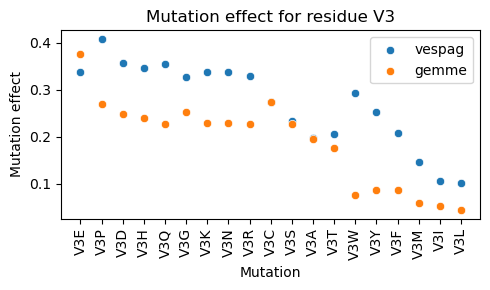

In [30]:
residue = 'V3'

# for V3 plot the mutation effect of all possible mutations for vespag and gemme 
plotting = scores[scores.residue == residue].sort_values('combined_score', ascending=False)

fig, ax = plt.subplots(figsize=(5, 3))
sns.scatterplot(x='mutation', y='mutation_effect_normalized_vespag', data=plotting, ax=ax, label='vespag')
sns.scatterplot(x='mutation', y='mutation_effect_normalized_gemme', data=plotting, ax=ax, label='gemme')
ax.set_title(f'Mutation effect for residue {residue}')
ax.set_ylabel('Mutation effect')
ax.set_xlabel('Mutation')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()